## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = merged_df["Mouse ID"].value_counts()
len(number_of_mice)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = pd.DataFrame(duplicate)
duplicate_mouse

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicate)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_df["Mouse ID"].value_counts()
len(number_of_mice)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std_dev = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

tumor_volume_df = pd.DataFrame({"Total Tumor Value Mean": mean,
                               "Total Tumor Value Median": median,
                                "Total Tumor Value Variance": variance,
                                "Tumor Value Standard Deviation": std_dev,
                                "Total Tumor Value SEM": sem
                            })
tumor_volume_df
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Total Tumor Value Mean,Total Tumor Value Median,Total Tumor Value Variance,Tumor Value Standard Deviation,Total Tumor Value SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_df = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregation_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

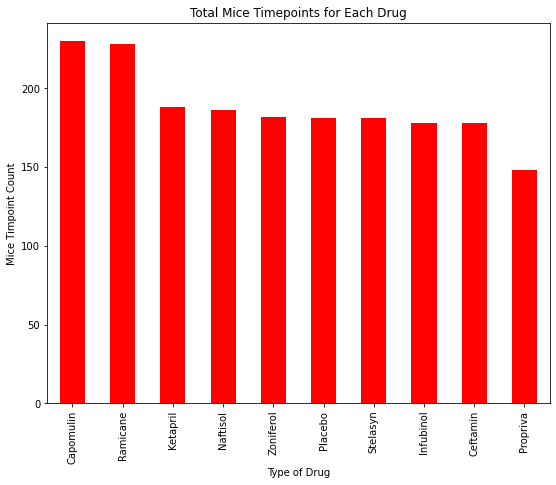

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df["Drug Regimen"].value_counts()
figure_1 = timepoint.plot(kind="bar", facecolor="red", figsize=(9,7), xlabel = "Type of Drug", ylabel = "Mice Timpoint Count", 
                          title = "Total Mice Timepoints for Each Drug")


plt.show()

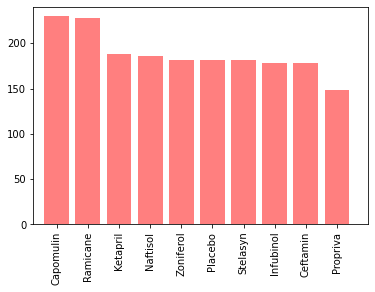

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = timepoint.values
x_axis = timepoint.index.values

plt.bar(x_axis, y_axis, facecolor="red", alpha=.5, align="center")

plt.xticks(rotation="vertical")
plt.xlim(-.75, len(x_axis))
plt.ylim(0, max(timepoint)+10)

plt.show()

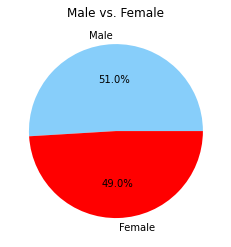

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_df["Sex"].value_counts()

labels = ["Male", "Female"]

colors = ["lightskyblue", "red"]

figure_2 = plt.pie(male_female, labels=labels, colors=colors, autopct="%1.1f%%")

plt.title("Male vs. Female")

plt.show()

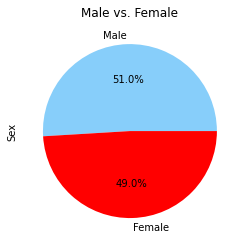

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplot_figure = male_female.plot(kind="pie", autopct = "%1.1f%%", title="Male vs. Female", colors = ["lightskyblue","red"])

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_df.groupby("Mouse ID").max()["Timepoint"]
timepoint_df = pd.DataFrame(timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_volume = pd.merge(timepoint_df, clean_df, on=["Mouse ID", "Timepoint"])
merged_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
total_tumor_volume = []

for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_volume.loc[merged_volume["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    #ad subset
    total_tumor_volume.append(tumor_volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    total_iqr = upper - lower
    lower_bound = lower - (1.5*total_iqr)
    upper_bound = upper + (1.5*total_iqr) 
    
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}s potential outliers: {outliers}")
    

Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


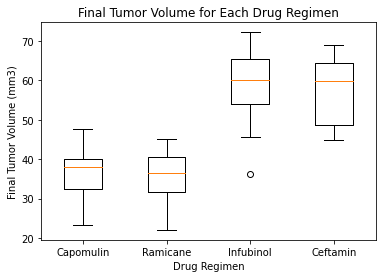

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(total_tumor_volume, labels=drugs)
plt.title("Final Tumor Volume for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

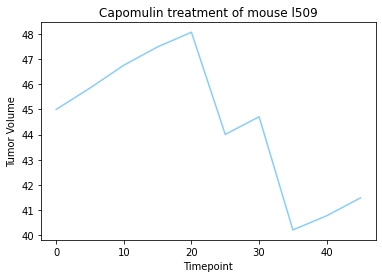

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]

mouse = "l509"
mouse_df = clean_df.loc[clean_df["Mouse ID"]== mouse]

scatter_plt = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], color = "lightskyblue")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

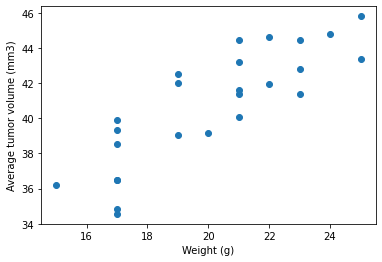

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_capo_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor = new_capo_df["Tumor Volume (mm3)"].mean()
weight = new_capo_df["Weight (g)"].unique()
plt.scatter(weight, avg_tumor)
plt.ylabel("Average tumor volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


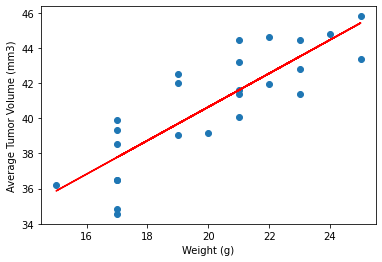

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = weight.astype(float)
coefficient = st.pearsonr(weight, avg_tumor)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.scatter(weight, avg_tumor)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="lightskyblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()

